# **DS605: Foundation of Machine Learning**
### Academic Year 2024-25 [Autumn] LAB ASSIGNMENT 1

### Instructor:
* Dr. Arpit Rana

### Teaching Assistant:

* Himanshu Beniwal
* Bhavan Bhatt

## **THE OUTFLIERS**
### Group Leader:
* Kumar Sanskar (202418027)

### Group Members:
* Jalak Vyas (202418062)
* Lokesh Kumawat (202418028)
* Saarthak Jindal (202418046)

## ** Impact of Extreme Weather Condition on performance of Solar PV Plants in the US**

### Credit for the dataset:

* Sandia National Laboratories

* US Department of Energy

* https://catalog.data.gov/

** This dataset has been used is the research paper titled ; "Evaluation of Extreme Weather Impacts on Utility-scale Photovoltaic Plant Performance in the United States"
by Nicole D. Jacksona, Thushara Gundaa,
Sandia National Laboratories.

### About the data:

This dataset contains data of three data types (operations and maintenance tickets, weather data, and production data) that can be used to predict the low performance ratio of utility-scale photovoltaic (PV) plants during extreme weather conditions in the US.

The US is divided into multiple regions by NOAA based on their location. Furthermore, there are 10 zones based on Temperature and 5 zones based on Humidity.

### Target variable:

***Performance Ratio(PR)***, defined by IEC 61724, is quotient of the system’s final yield to its reference yield. It indicates the overall effect of losses on the system output.

### Terminology:

* NOAA: National Oceanic and Atmospheric Administration
* IEC 61724 is a series of standards that define parameters for monitoring the performance of photovoltaic (PV) systems
* Irradiance is the radiometry term for the power per unit area of electromagnetic radiation incident on a surface. The SI unit for irradiance is watts per square meter [W/m2], or milli watts per square milli metre [mW/mm2].

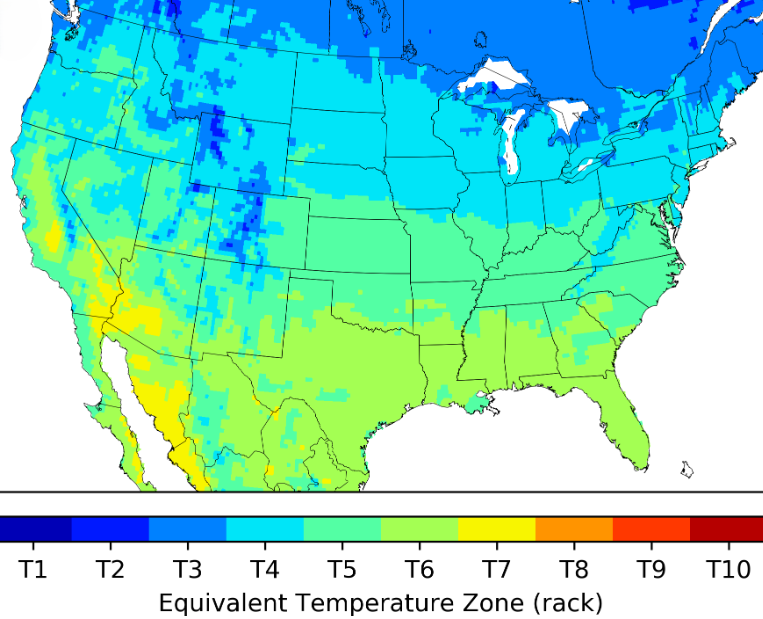

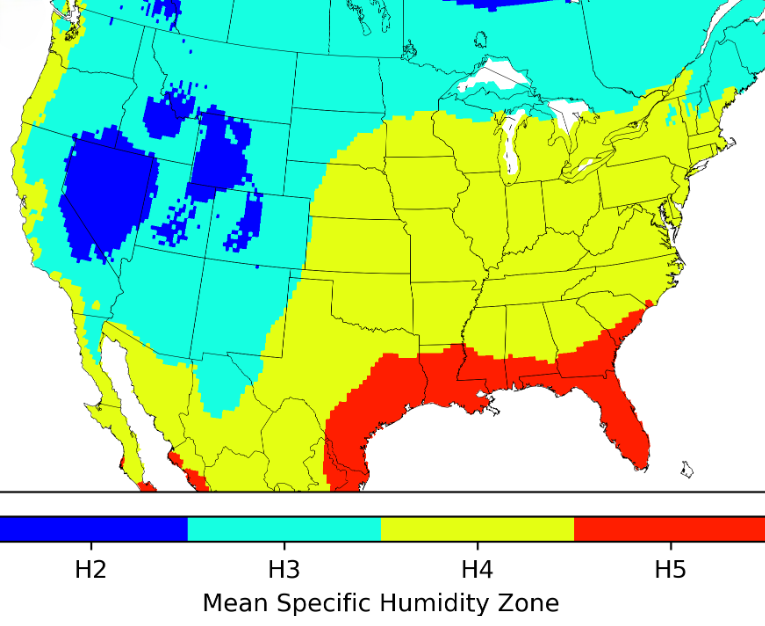

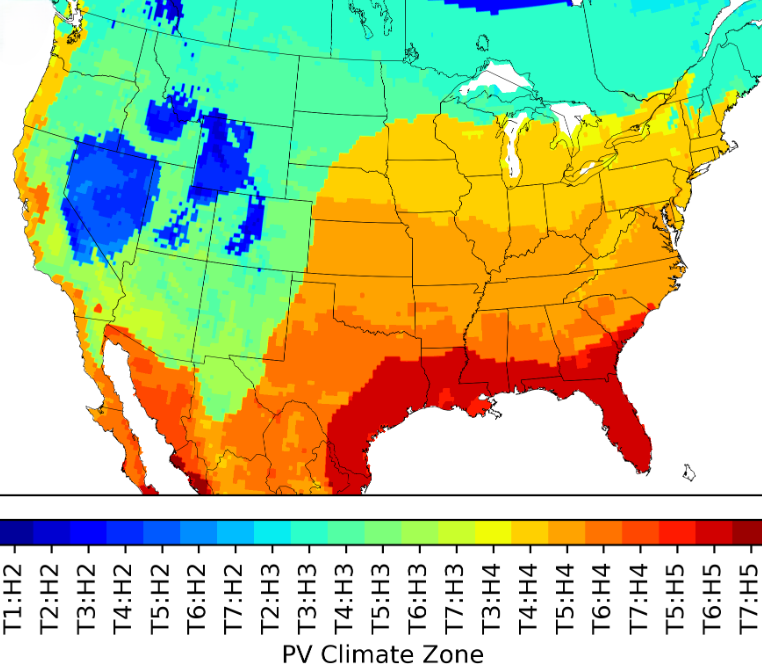

# Importing Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, average_precision_score

# Libraries used
* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
* NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
* Plotly Express is a dynamic, consistent, high-level API for creating figures.
* Seaborn is a library for making statistical graphics in Python, which builds on top of matplotlib and integrates closely with pandas data structures.
* Scikit Learn is a simple and efficient tool for predictive data analysis, accessible to everybody, and reusable in various contexts,it builds on top of NumPy, SciPy, and matplotlib

# Loading the Dataset

Specified datatype for columns having values of multiple data types.

In [2]:
dtype_spec = {
    'snow_bin_ticket_minutes': 'str',
    'snow_affected_assets': 'str',
    'hurr_bin_ticket_minutes': 'str',
    'hurr_affected_assets': 'str',
    'storm_bin_ticket_minutes': 'str',
    'storm_affected_assets': 'str',
}
data = pd.read_csv(r"C:\Users\student\Downloads\newdataset.csv",dtype=dtype_spec)
data.head()

randid        Date NOAAClimRegion TempZone HumidZone bin_PlantSize_kW  \
0   C2S1  01-04-2018           West       T6        H4            large   
1   C2S1  02-04-2018           West       T6        H4            large   
2   C2S1  03-04-2018           West       T6        H4            large   
3   C2S1  04-04-2018           West       T6        H4            large   
4   C2S1  05-04-2018           West       T6        H4            large   

   plant_age_months active_snow_tickets snow_bin_ticket_minutes  \
0              19.0                  No                    None   
1              19.0                  No                    None   
2              19.0                  No                    None   
3              19.0                  No                    None   
4              19.0                  No                    None   

  snow_affected_assets  ... storm_affected_assets  storm_production_level  \
0                 None  ...                  None                 Unknown   
1                 None  ...                  None                 Unknown   
2                 None  ...                  None                 Unknown   
3                 None  ...                  None                 Unknown   
4                 None  ...                  None                 Unknown   

   lightning  storm  duration_minutes_storm  nearest_storm flood  \
0          0    0.0                       0           2420   0.0   
1          0    0.0                       0           2420   0.0   
2          0    0.0                       0           2420   0.0   
3          0    0.0                       0           2420   0.0   
4          0    0.0                       0           2420   0.0   

  duration_minutes_flood nearest_flood rain  
0                      0          2255  0.0  
1                      0          2255  0.0  
2                      0          2255  0.0  
3                      0          2255  0.0  
4                      0          2255  0.0  

[5 rows x 38 columns]

In [3]:
df = pd.DataFrame(data)

df.replace({None: np.nan}, inplace=True)
df.shape,df.columns

((51504, 38),
 Index(['randid', 'Date', 'NOAAClimRegion', 'TempZone', 'HumidZone',
        'bin_PlantSize_kW', 'plant_age_months', 'active_snow_tickets',
        'snow_bin_ticket_minutes', 'snow_affected_assets',
        'snow_production_level', 'PR', 'snow_value_mm', 'total_daily_snow_mm',
        'low_irradiation', 'cumulative_snow_mm', 'hurr_bin_ticket_minutes',
        'hurr_affected_assets', 'hurr_production_level', 'HurricanePrep',
        'HurricanePostInspection', 'hurricane', 'nearest_hurricane',
        'wind_speed_mean', 'rain_value_mm', 'nearest_rain',
        'storm_active_tickets', 'storm_bin_ticket_minutes',
        'storm_affected_assets', 'storm_production_level', 'lightning', 'storm',
        'duration_minutes_storm', 'nearest_storm', 'flood',
        'duration_minutes_flood', 'nearest_flood', 'rain'],
       dtype='object'))

In [4]:
df['active_snow_tickets'] = df['active_snow_tickets'].replace({'Yes': 1, 'No': 0})
df['HurricanePrep'] = df['HurricanePrep'].replace({'Yes': 1, 'No': 0})
df['HurricanePostInspection'] = df['HurricanePostInspection'].replace({'Yes': 1, 'No': 0})
df['storm_active_tickets'] = df['storm_active_tickets'].replace({'Yes': 1, 'No': 0})
df['wind_speed_mean'] = df['wind_speed_mean'].replace({'#NUM!': np.nan})
df['wind_speed_mean'] = df['wind_speed_mean'].astype(float)

# Identifying The Numerical and Categorital Type Features

In [5]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features,"\n")
categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:')
print(categorical_features)

There are 23 numerical features:
['plant_age_months', 'active_snow_tickets', 'PR', 'snow_value_mm', 'total_daily_snow_mm', 'low_irradiation', 'cumulative_snow_mm', 'HurricanePrep', 'HurricanePostInspection', 'hurricane', 'nearest_hurricane', 'wind_speed_mean', 'rain_value_mm', 'nearest_rain', 'storm_active_tickets', 'lightning', 'storm', 'duration_minutes_storm', 'nearest_storm', 'flood', 'duration_minutes_flood', 'nearest_flood', 'rain'] 

There are 15 categorical features:
['randid', 'Date', 'NOAAClimRegion', 'TempZone', 'HumidZone', 'bin_PlantSize_kW', 'snow_bin_ticket_minutes', 'snow_affected_assets', 'snow_production_level', 'hurr_bin_ticket_minutes', 'hurr_affected_assets', 'hurr_production_level', 'storm_bin_ticket_minutes', 'storm_affected_assets', 'storm_production_level']


# Unique Values in Categorical Features

In [6]:
def unique_counts(df):
    unique_counts = {}
    for column in categorical_features:
        unique_values = df[column].unique()
        counts = df[column].value_counts()
        unique_counts[column] = {
            'unique_values': unique_values,
            'counts': counts
        }
    return unique_counts
unique_counts = unique_counts(df)
for column, data in unique_counts.items():
    print(data['counts'])
    print()

C3S33     739
C3S39     736
C3S30     732
C3S31     732
C3S38     621
         ... 
C2S132      9
C2S125      9
C2S61       6
C2S60       6
C2S23       4
Name: randid, Length: 174, dtype: int64

01-03-2019    171
02-03-2019    171
03-03-2019    171
04-03-2019    171
09-03-2019    170
             ... 
27-02-2018      2
28-02-2018      2
22-02-2018      1
23-02-2018      1
24-02-2018      1
Name: Date, Length: 739, dtype: int64

West             23915
Southeast         8202
Upper Midwest     7704
Northeast         6299
Northwest         2012
Southwest         1613
Ohio Valley        914
South              792
Hawaii              53
Name: NOAAClimRegion, dtype: int64

T5    23465
T4    15623
T6    11649
T7      506
T1      261
Name: TempZone, dtype: int64

H4    46103
H3     2435
H5     1913
H2     1053
Name: HumidZone, dtype: int64

small     18083
large     17356
medium    16065
Name: bin_PlantSize_kW, dtype: int64

None        50714
Majority      755
Partial        35
Name: snow_bin_t

# Data Cleaning

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

randid                          0
Date                            0
NOAAClimRegion                  0
TempZone                        0
HumidZone                       0
bin_PlantSize_kW                0
plant_age_months              148
active_snow_tickets             0
snow_bin_ticket_minutes         0
snow_affected_assets            0
snow_production_level          67
PR                           1564
snow_value_mm                5822
total_daily_snow_mm          6177
low_irradiation                 0
cumulative_snow_mm          12278
hurr_bin_ticket_minutes         0
hurr_affected_assets            0
hurr_production_level          17
HurricanePrep                   0
HurricanePostInspection         0
hurricane                    5751
nearest_hurricane               0
wind_speed_mean             11167
rain_value_mm               10801
nearest_rain                    0
storm_active_tickets            0
storm_bin_ticket_minutes        0
storm_affected_assets           0
storm_producti

## Dealing with Null Values

In [8]:
df = df[df['plant_age_months'] >= 0]
df[['snow_bin_ticket_minutes', 'snow_affected_assets', 'snow_production_level']] = df[['snow_bin_ticket_minutes', 'snow_affected_assets', 'snow_production_level']].replace(['Unknown', None], 'na')
df = df.dropna(subset=['PR'])
df = df.drop(columns=['cumulative_snow_mm','wind_speed_mean'])
df[['flood', 'storm']] = df[['flood', 'storm']].fillna(0)
df[['rain', 'rain_value_mm']] = df[['rain', 'rain_value_mm']].fillna(0)
df[['snow_bin_ticket_minutes', 'snow_production_level', 'hurr_bin_ticket_minutes', 'hurr_production_level', 'storm_bin_ticket_minutes', 'storm_production_level']] = df[['snow_bin_ticket_minutes', 'snow_production_level', 'hurr_bin_ticket_minutes', 'hurr_production_level', 'storm_bin_ticket_minutes', 'storm_production_level']].fillna('na')
df[['snow_affected_assets','hurr_affected_assets','storm_affected_assets']] = df[['snow_affected_assets','hurr_affected_assets','storm_affected_assets']].fillna('na')

In [9]:
df = df.dropna(subset=['PR','snow_value_mm','total_daily_snow_mm'])

# Checking Combinations of Categorical Features

In [10]:
combinationsClimRegion_TempZone = df[['NOAAClimRegion', 'TempZone']].drop_duplicates()
print(combinationsClimRegion_TempZone)

      NOAAClimRegion TempZone
0               West       T6
366        Northeast       T4
541             West       T5
2389       Southwest       T6
2755       Southeast       T6
3139       Southeast       T5
6764            West       T4
6773       Northeast       T5
9182       Southwest       T7
10154      Southwest       T5
11270    Ohio Valley       T4
38157           West       T1
39840      Northwest       T4
41028      Northwest       T5
42433  Upper Midwest       T4


In [11]:
combinationsClimRegion_HumidZone = df[['NOAAClimRegion', 'HumidZone']].drop_duplicates()
print(combinationsClimRegion_HumidZone)

      NOAAClimRegion HumidZone
0               West        H4
366        Northeast        H4
2389       Southwest        H4
2755       Southeast        H4
9182       Southwest        H3
9413       Southeast        H5
11270    Ohio Valley        H4
38157           West        H2
39840      Northwest        H3
41028      Northwest        H2
42433  Upper Midwest        H4


In [12]:
combinationsTempZone_HumidZone = df[['TempZone', 'HumidZone']].drop_duplicates()
print(combinationsTempZone_HumidZone)

      TempZone HumidZone
0           T6        H4
366         T4        H4
541         T5        H4
9182        T7        H3
9413        T5        H5
10154       T5        H3
38157       T1        H2
39840       T4        H3
41028       T5        H2


# Data Analysis

The change in Performance Ratio is observed for different types of extreme weather conditions.

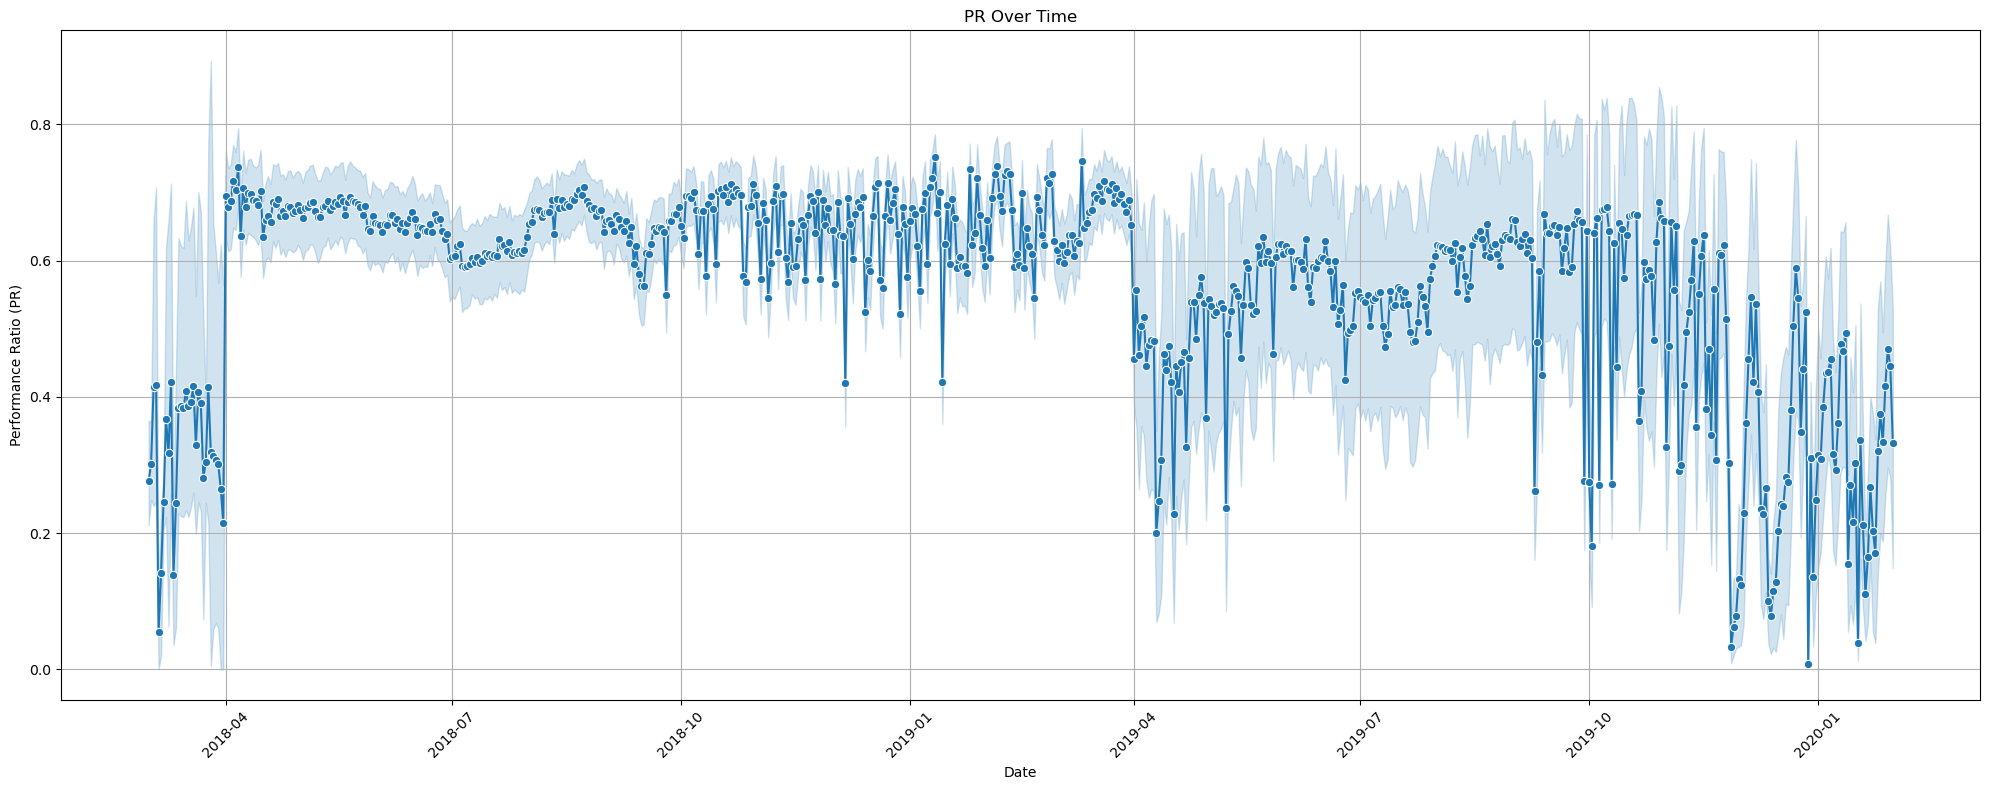

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='PR', data=df, marker='o')
plt.title('PR Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Ratio (PR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since there is inconsistent amount of data for each year, time series analysis can not be used for predictive analysis.

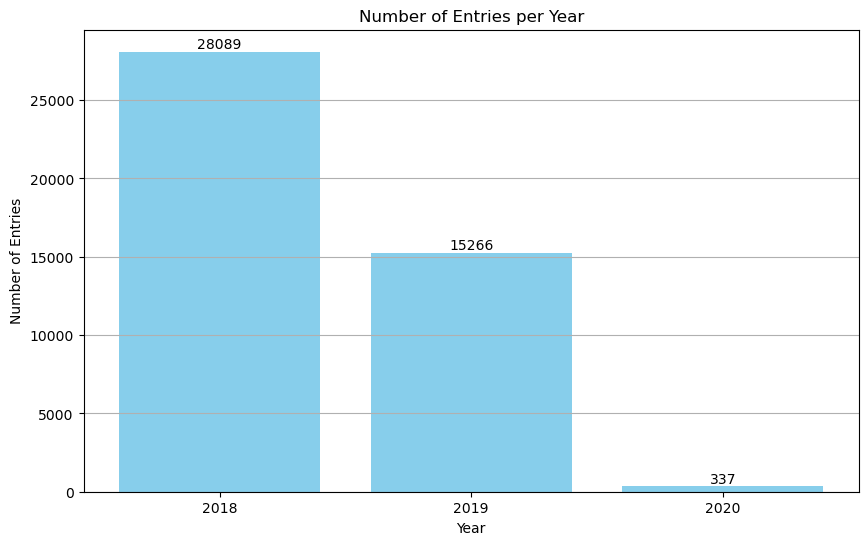

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

entries_per_year = df['Year'].value_counts()


plt.figure(figsize=(10, 6))
bars = plt.bar(entries_per_year.index, entries_per_year.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')
plt.xticks([2018, 2019, 2020])

plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(axis='y')
plt.show()

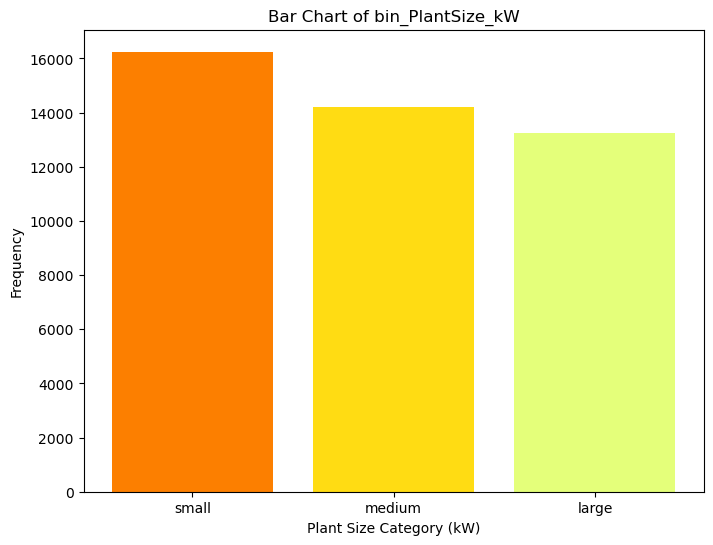

In [15]:
counts = df['bin_PlantSize_kW'].value_counts()
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap('Wistia')
norm = plt.Normalize(min(counts), max(counts))
plt.bar(counts.index, counts.values, color=cmap(norm(counts)))
plt.xlabel('Plant Size Category (kW)')
plt.ylabel('Frequency')
plt.title('Bar Chart of bin_PlantSize_kW')
plt.show()

The utility-scale PV plants are majorly divided into three categories based on their size, and the number of data points from each category is close to each other.

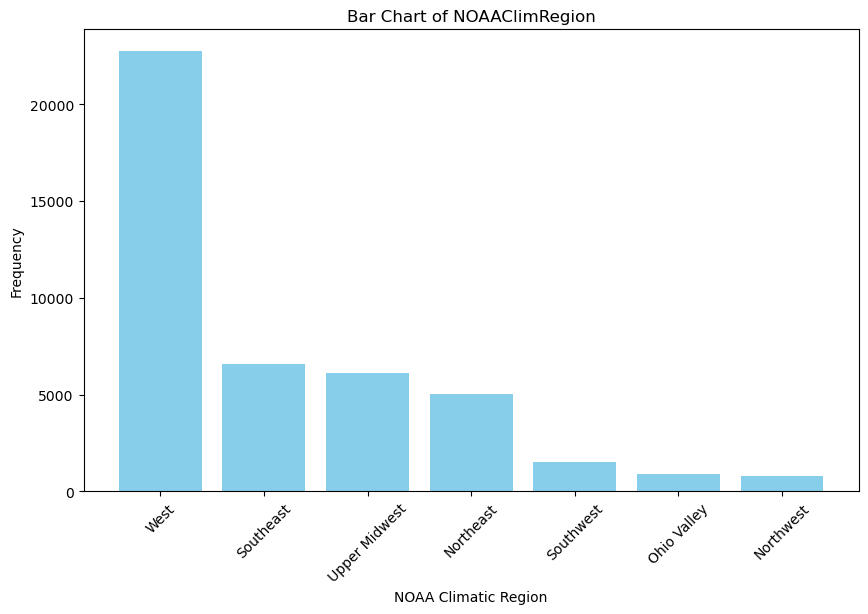

In [16]:
counts = df['NOAAClimRegion'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('NOAA Climatic Region')
plt.ylabel('Frequency')
plt.title('Bar Chart of NOAAClimRegion')
plt.xticks(rotation=45)
plt.show()

Majority of data points belong to the plants based in West Region of USA as described by NOAA.

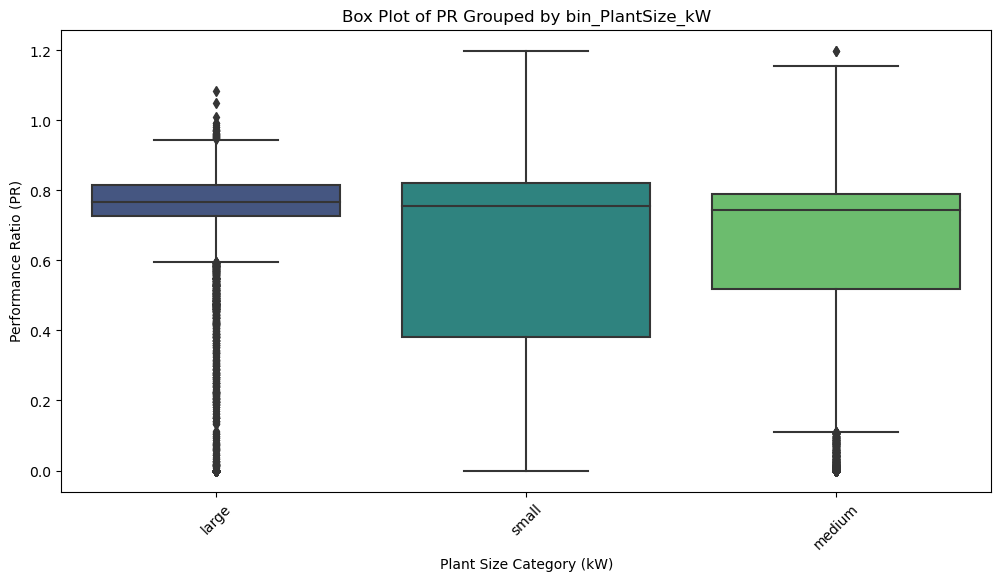

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bin_PlantSize_kW', y='PR', data=df, palette='viridis')

plt.xlabel('Plant Size Category (kW)')
plt.ylabel('Performance Ratio (PR)')
plt.title('Box Plot of PR Grouped by bin_PlantSize_kW')
plt.xticks(rotation=45)

plt.show()

The median of Performance ratio is very close to each other in the data based on the plant size.

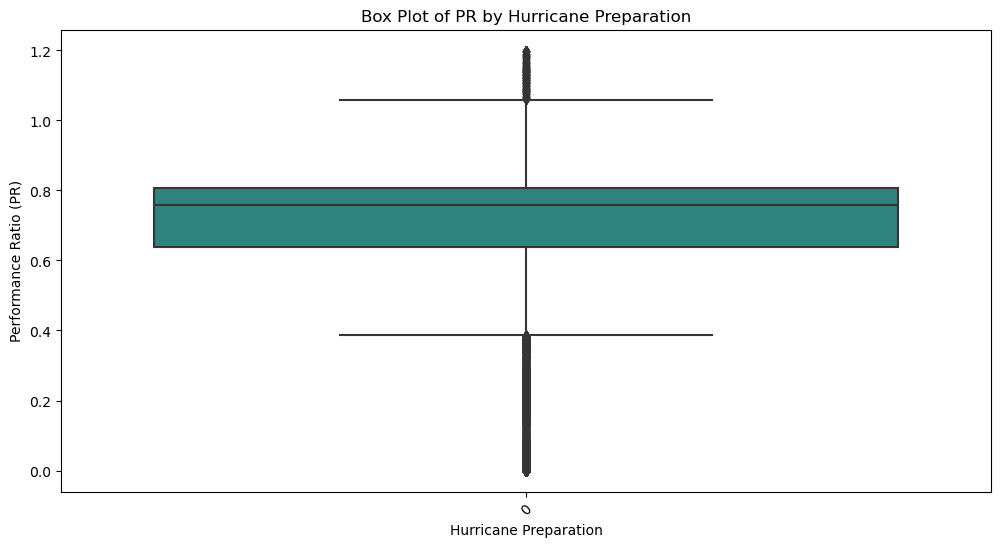

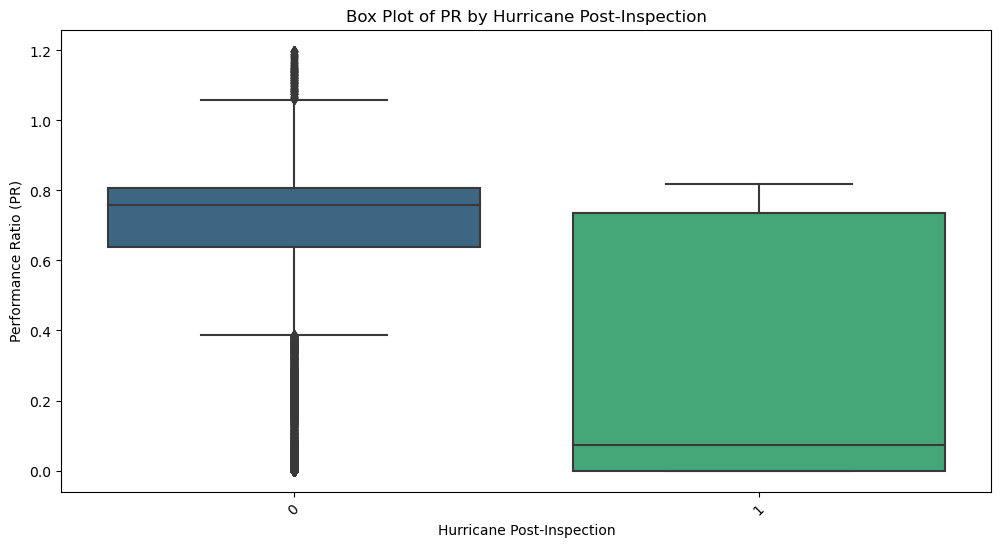

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HurricanePrep', y='PR', data=df, palette='viridis')
plt.xlabel('Hurricane Preparation')
plt.ylabel('Performance Ratio (PR)')
plt.title('Box Plot of PR by Hurricane Preparation')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='HurricanePostInspection', y='PR', data=df, palette='viridis')
plt.xlabel('Hurricane Post-Inspection')
plt.ylabel('Performance Ratio (PR)')
plt.title('Box Plot of PR by Hurricane Post-Inspection')
plt.xticks(rotation=45)
plt.show()

There is major difference in median and quartiles of PR based on Hurrican Preparation and Hurricane Post Inspection.

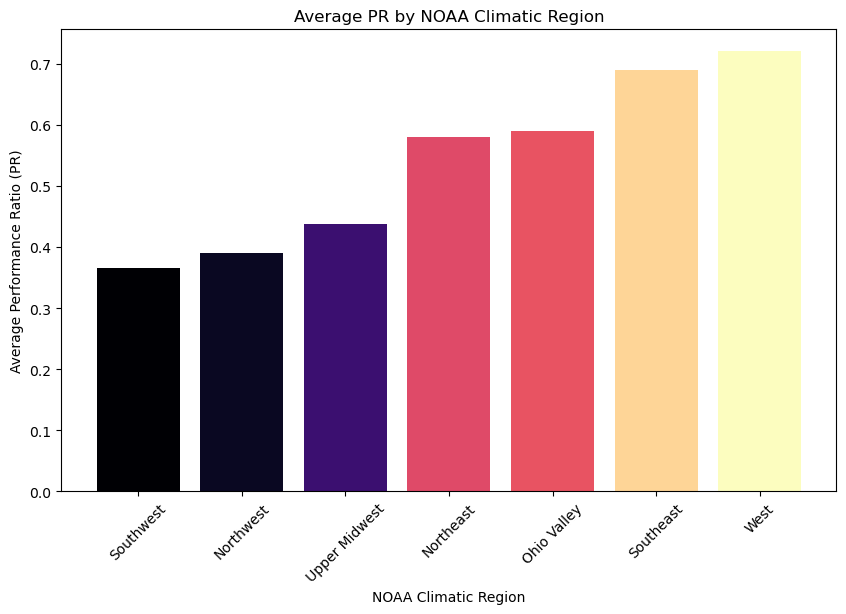

In [19]:
pr_avg_by_region = df.groupby('NOAAClimRegion')['PR'].mean().sort_values()
cmap = plt.get_cmap('magma')

norm = plt.Normalize(min(pr_avg_by_region), max(pr_avg_by_region))
plt.figure(figsize=(10, 6))
plt.bar(pr_avg_by_region.index, pr_avg_by_region.values, color=cmap(norm(pr_avg_by_region)))
plt.xlabel('NOAA Climatic Region')
plt.ylabel('Average Performance Ratio (PR)')
plt.title('Average PR by NOAA Climatic Region')
plt.xticks(rotation=45)
plt.show()

The average PR of West region is highest, this could be a good factor to argue that why majority of the data point is of the plants in West region as there the solar plants tend to work better than that of other places.

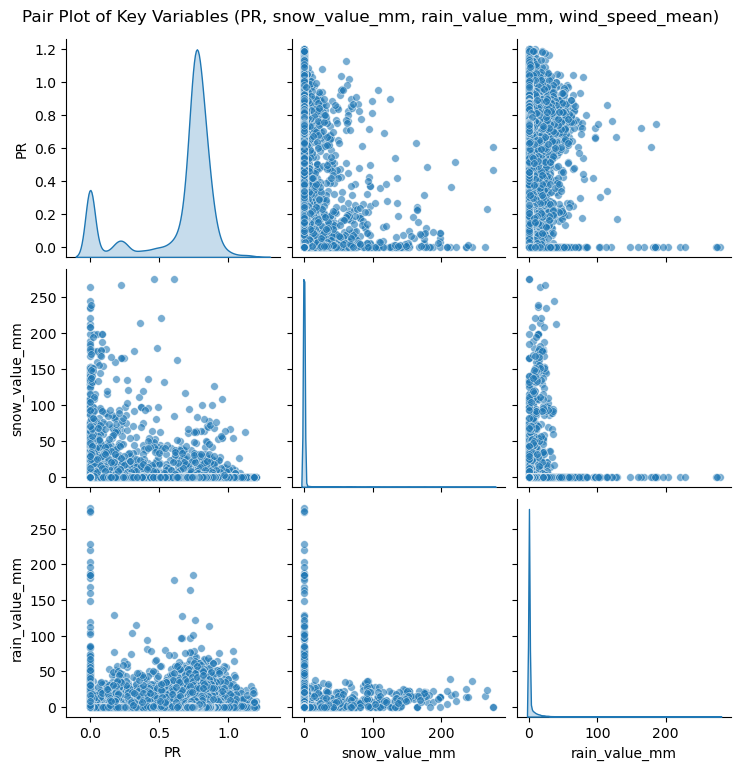

In [20]:
key_variables = ['PR', 'snow_value_mm', 'rain_value_mm']

sns.pairplot(df[key_variables], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Pair Plot of Key Variables (PR, snow_value_mm, rain_value_mm, wind_speed_mean)', y=1.02)
plt.show()

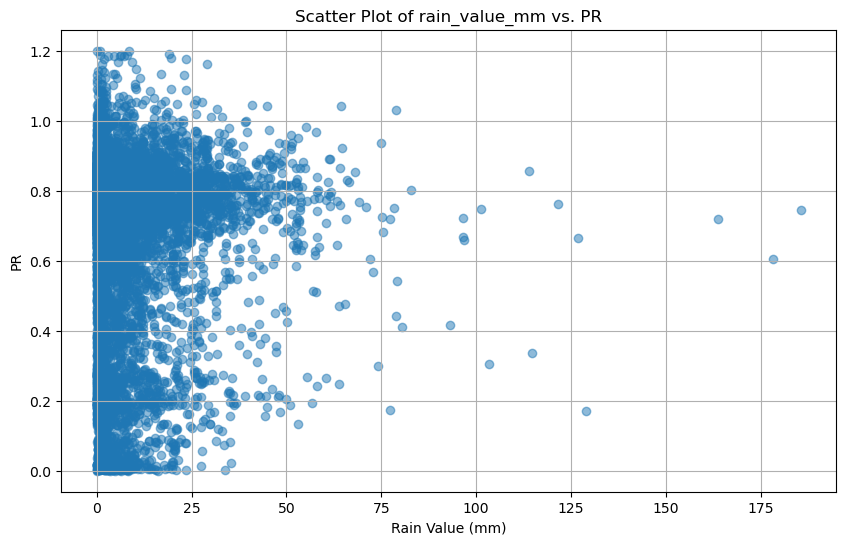

In [21]:
scatter_data = df[['rain_value_mm', 'PR']].dropna()
scatter_data = scatter_data[(scatter_data['rain_value_mm'] > 0) & (scatter_data['PR'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['rain_value_mm'], scatter_data['PR'], alpha=0.5)
plt.title('Scatter Plot of rain_value_mm vs. PR')
plt.xlabel('Rain Value (mm)')
plt.ylabel('PR')
plt.grid(True)
plt.show()

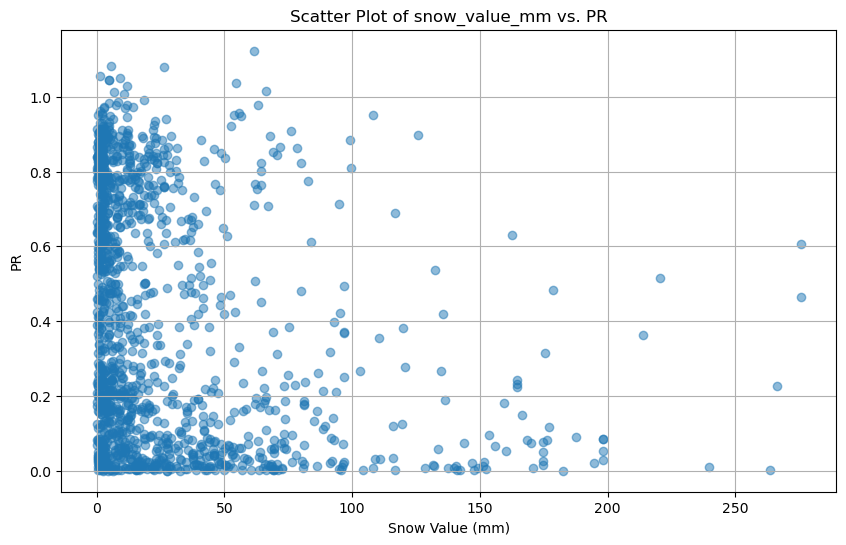

In [22]:
scatter_data = df[['snow_value_mm', 'PR']].dropna()
scatter_data = scatter_data[(scatter_data['snow_value_mm'] > 0) & (scatter_data['PR'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['snow_value_mm'], scatter_data['PR'], alpha=0.5)
plt.title('Scatter Plot of snow_value_mm vs. PR')
plt.xlabel('Snow Value (mm)')
plt.ylabel('PR')
plt.grid(True)
plt.show()

The three scatter-plots above show the relation between PR and three different factors for extreme weather conditions.

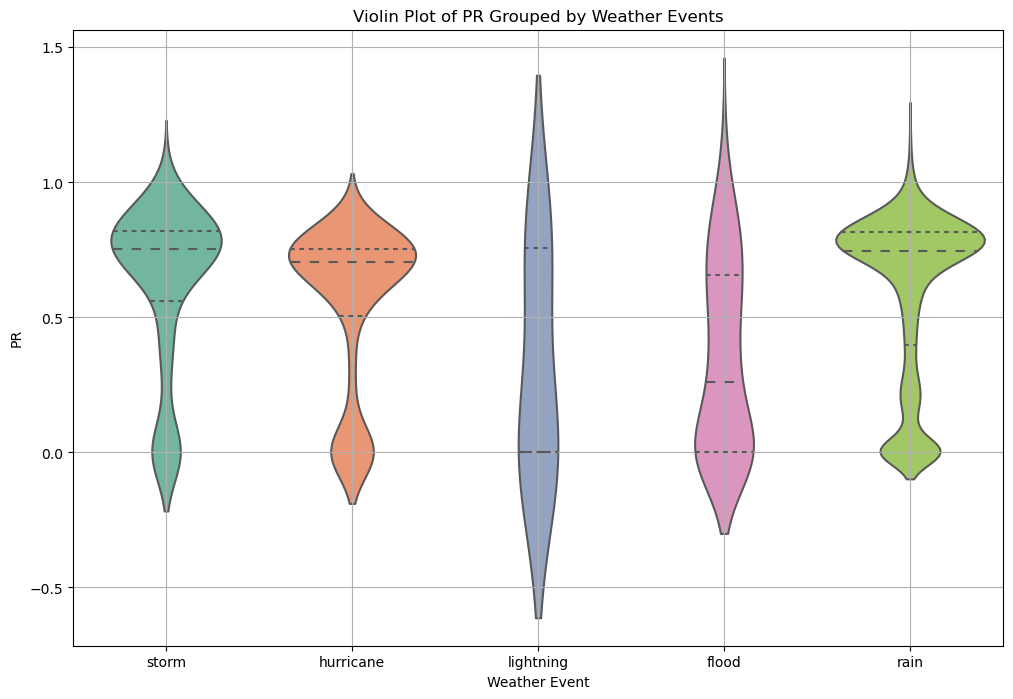

In [23]:
weather_events = ['storm', 'hurricane', 'lightning', 'flood', 'rain']
violin_data = df[['PR'] + weather_events].apply(pd.to_numeric, errors='coerce')

violin_data_melted = violin_data.melt(id_vars='PR', value_vars=weather_events, var_name='Weather Event', value_name='Occurrence')

violin_data_melted = violin_data_melted[violin_data_melted['Occurrence'] > 0]

plt.figure(figsize=(12, 8))
sns.violinplot(x='Weather Event', y='PR', data=violin_data_melted, inner='quartile', palette='Set2')
plt.title('Violin Plot of PR Grouped by Weather Events')
plt.ylabel('PR')
plt.grid(True)
plt.show()

This violin graph shows the range of PR for different types of extreme weather events and their variations.

In [24]:
sunburst_data = df[['NOAAClimRegion', 'TempZone', 'HumidZone', 'PR']]

sunburst_data = sunburst_data.dropna()

fig = px.sunburst(
    sunburst_data,
    path=['NOAAClimRegion', 'TempZone', 'HumidZone'],
    values='PR',
    title="Sunburst Chart of PR across NOAA Climate Regions, Temperature Zones, and Humidity Zones",
    height =800,width =800
)

fig.show()

In [25]:
X = df.drop(columns=['PR','randid'])
y = df['PR']

# Label Encoding

In [26]:
dfold = df
catfeatures = ['randid','NOAAClimRegion', 'TempZone', 'HumidZone', 'bin_PlantSize_kW', 'snow_bin_ticket_minutes', 'snow_production_level', 'hurr_bin_ticket_minutes', 'hurr_production_level', 'storm_bin_ticket_minutes', 'storm_production_level','snow_affected_assets', 'hurr_affected_assets','storm_affected_assets']

for column in catfeatures:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

# Machine Learning Models

Since the dataset being used consists of both categorical and numerical features, and the imput variables related to each weather condition can be considered as disjoint to input variables of others, we believed that tree-based models would work very well with the data. Since the data can be segmented into subsets to build decision tree. So, the following models are used:
 * Decision Tree Regressor
 * Random Forest Regressor
 * XGBoost Regressor

# Decision Tree Regressor

### Decision Tree Regressor:
Decision Tree Regressor is the most simple tree based regression model. It breaks down dataset into small subsets while a decision tree is incrementally developed.

### Pseudo-Code:

FUNCTION InitializeDecisionTreeRegressor(Dataset, Features, Target):
    
#No explicit initialization in decision tree; starts with the data
    RETURN

FUNCTION BuildDecisionTree(Dataset, Features, Target, Parameters):
    
    #Parameters could include max_depth, min_samples_split, etc.
    
    IF ShouldStopSplitting(Dataset, Target, Features, Parameters) THEN
        RETURN CreateLeafNode(Target)
    
    # Find the Best Split
    BestFeature, BestValue, BestSplit = FindBestSplit(Dataset, Features, Target, Parameters)
    
    IF BestSplit IS NULL THEN
        RETURN CreateLeafNode(Target)
    
    # Split the Dataset
    LeftDataset, RightDataset = SplitDataset(Dataset, BestFeature, BestValue)
    LeftTarget, RightTarget = SplitTarget(Target, BestFeature, BestValue)
    
    # Recursively Build Subtrees
    LeftTree = BuildDecisionTree(LeftDataset, Features, LeftTarget, Parameters)
    RightTree = BuildDecisionTree(RightDataset, Features, RightTarget, Parameters)
    
    # Create and Return a Decision Node
    DecisionNode = CreateDecisionNode(BestFeature, BestValue, LeftTree, RightTree)
    RETURN DecisionNode
FUNCTION PredictDecisionTree(Tree, NewInstance):
    CURRENT_NODE = Tree.RootNode
    
    WHILE CURRENT_NODE IS NOT A LeafNode:
        IF NewInstance[CURRENT_NODE.Feature] <= CURRENT_NODE.Value THEN
            CURRENT_NODE = CURRENT_NODE.LeftChild
        ELSE
            CURRENT_NODE = CURRENT_NODE.RightChild
    
    RETURN CURRENT_NODE.Prediction

# XGB Regressor

### XGB Regressor:
XGBoost is a powerful approach for building supervised regression models, which uses scalable gradient tree boosting system. It is an ensemble model.

### Pseudo-Code:

FUNCTION InitializeModel(Dataset, Parameters):
    BasePrediction = Mean(TargetValues)  
    # Initialize predictions with the mean of the target values
    Predictions = Array of BasePrediction for each instance in Dataset
    Residuals = TargetValues - Predictions
    
    RETURN (BasePrediction, Predictions, Residuals)
FUNCTION TrainXGBoost(Dataset, Features, TargetValues, Parameters):
    (BasePrediction, Predictions, Residuals) = InitializeModel(Dataset, Parameters)
    
    FOR round in 1 to NumberOfBoostingRounds:
        # Step 1: Compute Gradient and Hessian
        (Gradient, Hessian) = ComputeGradientHessian(Residuals)
        
        # Step 2: Build a New Tree
        Tree = BuildTree(Features, Gradient, Hessian, Parameters)
        
        # Step 3: Update Predictions
        TreePrediction = PredictWithTree(Tree, Dataset)  
        # Predict using the newly built tree
        UpdateValue = LearningRate * TreePrediction       
        # Scale tree predictions by learning rate
        Predictions = Predictions + UpdateValue           
        # Update overall predictions
        
        # Step 4: Compute New Residuals
        Residuals = TargetValues - Predictions
    
    RETURN Model (Ensemble of Trees)
FUNCTION PredictXGBoost(Model, NewInstance, Parameters):
    BasePrediction = Model.BasePrediction  
    # Extract base prediction from trained model
    Prediction = BasePrediction
    
    FOR each Tree in Model:
        TreePrediction = PredictWithTree(Tree, NewInstance)  
        # Predict with the current tree
        Prediction = Prediction + LearningRate * TreePrediction  
        # Update prediction with tree's contribution
    
    RETURN Prediction














# Random Forest Regressor

### Random Forest Regressor:
Random Forest Regressor is an ensemble model which uses bagging technique to combine multiple decision trees into one model to make prediction. It gives average and weighted average of all the individual decision trees' predictions.

### Pseudo-Code:

FUNCTION InitializeModel(Dataset, Parameters):
    
#Random Forest does not need an initial prediction value
    
#We initialize the model by preparing for multiple trees
    
    RETURN EmptyForest()

FUNCTION TrainRandomForest(Dataset, Features, TargetValues, Parameters):
    Forest = InitializeModel(Dataset, Parameters)
    NumberOfTrees = Parameters.NumberOfTrees
    
    FOR treeIndex in 1 to NumberOfTrees:
        # Step 1: Bootstrap Sampling
        BootstrappedDataset = BootstrapSample(Dataset)
        BootstrappedTargetValues = TargetValues[Indices from BootstrappedDataset]
        
        # Step 2: Train a Decision Tree on the Bootstrapped Dataset
        Tree = TrainDecisionTree(BootstrappedDataset, Features, BootstrappedTargetValues, Parameters)
        
        # Step 3: Add the Tree to the Forest
        AddTreeToForest(Forest, Tree)
    
    RETURN Forest

FUNCTION PredictRandomForest(Forest, NewInstance, Parameters):
    Predictions = Array of Zeroes with length equal to number of trees in Forest
    
    FOR each Tree in Forest:
        TreePrediction = PredictWithTree(Tree, NewInstance)
        Add TreePrediction to Predictions
    
    # Aggregate predictions from all trees (typically by averaging)
    FinalPrediction = Mean(Predictions)
    
    RETURN FinalPrediction

FUNCTION BootstrapSample(Dataset):
    # Create a bootstrap sample by sampling with replacement from the Dataset
    RETURN SampledDataset

FUNCTION TrainDecisionTree(Dataset, Features, TargetValues, Parameters):
    # Train a decision tree regressor on the given dataset
    RETURN DecisionTree

FUNCTION PredictWithTree(Tree, NewInstance):
    # Predict the value for NewInstance using the provided tree
    RETURN TreePrediction

FUNCTION AddTreeToForest(Forest, Tree):
    # Add the trained tree to the forest
    RETURN UpdatedForest

# ML Pipeline

In [32]:
X1 = df.drop(columns=['PR', 'Date'])
y1 = df['PR']


models = {
    'decision_tree': DecisionTreeRegressor(max_depth=20,min_samples_leaf= 4,min_samples_split=10,random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'random_forest': RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42, n_jobs=-1)
}

def create_pipeline(model):
    return Pipeline(steps=[('regressor', model)])

pipelines = {
    name: create_pipeline(model)
    for name, model in models.items()
}

def evaluate_model(model_name, pipeline, X, y, cv_folds=9):
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    mse_cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
    mse_cv_scores = -mse_cv_scores  
    
    mae_cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mae_cv_scores = -mae_cv_scores  
    
    r2_cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
    
    mean_cv_mse = mse_cv_scores.mean()
    std_cv_mse = mse_cv_scores.std()
    mean_cv_rmse = np.sqrt(mean_cv_mse)
    std_cv_rmse = np.sqrt(std_cv_mse)
    
    mean_cv_mae = mae_cv_scores.mean()
    std_cv_mae = mae_cv_scores.std()
    
    mean_cv_r2 = r2_cv_scores.mean()
    std_cv_r2 = r2_cv_scores.std()
    
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    return mean_cv_mse, std_cv_mse, mean_cv_rmse, std_cv_rmse, mean_cv_mae, std_cv_mae, mean_cv_r2, std_cv_r2, mae, mse, rmse, r2

X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

metrics = {
    'decision_tree': {},
    'xgb': {},
    'random_forest': {}
}

for model_name in ['decision_tree', 'xgb', 'random_forest']:
    pipeline = pipelines[model_name]
    mean_cv_mse, std_cv_mse, mean_cv_rmse, std_cv_rmse, mean_cv_mae, std_cv_mae, mean_cv_r2, std_cv_r2, mae, mse, rmse, r2 = evaluate_model(model_name, pipeline, X_train1, y_train1)
    
    metrics[model_name] = {
        'mean_cv_mse': mean_cv_mse,
        'std_cv_mse': std_cv_mse,
        'mean_cv_rmse': mean_cv_rmse,
        'std_cv_rmse': std_cv_rmse,
        'mean_cv_mae': mean_cv_mae,
        'std_cv_mae': std_cv_mae,
        'mean_cv_r2': mean_cv_r2,
        'std_cv_r2': std_cv_r2,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

def print_metrics(model_name, metrics_data):
    print(f"\nModel: {model_name}")
    print(f"{'Metric':<25} {'CV Mean':<15} {'CV Std Dev':<15} {'Test Set':<15}")
    print(f"{'-' * 65}")
    print(f"{'Mean Squared Error':<25} {metrics_data['mean_cv_mse']:<15.4f} {metrics_data['std_cv_mse']:<15.4f} {metrics_data['mse']:<15.4f}")
    print(f"{'Root Mean Squared Error':<25} {metrics_data['mean_cv_rmse']:<15.4f} {metrics_data['std_cv_rmse']:<15.4f} {metrics_data['rmse']:<15.4f}")
    print(f"{'Mean Absolute Error':<25} {metrics_data['mean_cv_mae']:<15.4f} {metrics_data['std_cv_mae']:<15.4f} {metrics_data['mae']:<15.4f}")
    print(f"{'R-squared':<25} {metrics_data['mean_cv_r2']:<15.4f} {metrics_data['std_cv_r2']:<15.4f} {metrics_data['r2']:<15.4f}")

for model_name in metrics:
    print_metrics(model_name, metrics[model_name])


Model: decision_tree
Metric                    CV Mean         CV Std Dev      Test Set       
-----------------------------------------------------------------
Mean Squared Error        0.0227          0.0014          0.0104         
Root Mean Squared Error   0.1508          0.0368          0.1018         
Mean Absolute Error       0.0726          0.0019          0.0495         
R-squared                 0.7285          0.0148          0.8763         

Model: xgb
Metric                    CV Mean         CV Std Dev      Test Set       
-----------------------------------------------------------------
Mean Squared Error        0.0194          0.0007          0.0138         
Root Mean Squared Error   0.1392          0.0255          0.1175         
Mean Absolute Error       0.0799          0.0014          0.0686         
R-squared                 0.7685          0.0093          0.8351         

Model: random_forest
Metric                    CV Mean         CV Std Dev      Test Set      

From the metrics above of the three models used, we can see that the models generalize very well on the test set. The standard deviation of all the errors are very less, and the mean cross validation scores are pretty close to the test scores, so its safe to say that all the models are not over-fitting. 

The Random Forest regressor can be said to be the best performing model considering all the metrics, since it has the lowest errors and higher R^2 score.

The XGBoost Regressor is also a strong performer, with competitive metrics and good generalization. It performs well, particularly in terms of cross-validation metrics, and is a good alternative if there are specific considerations such as computational efficiency or model interpretability. 

The Decision Tree Regressor is the least performing model of all, since it has highest errors and low R^2 score. 

# Plotting Feature Importance

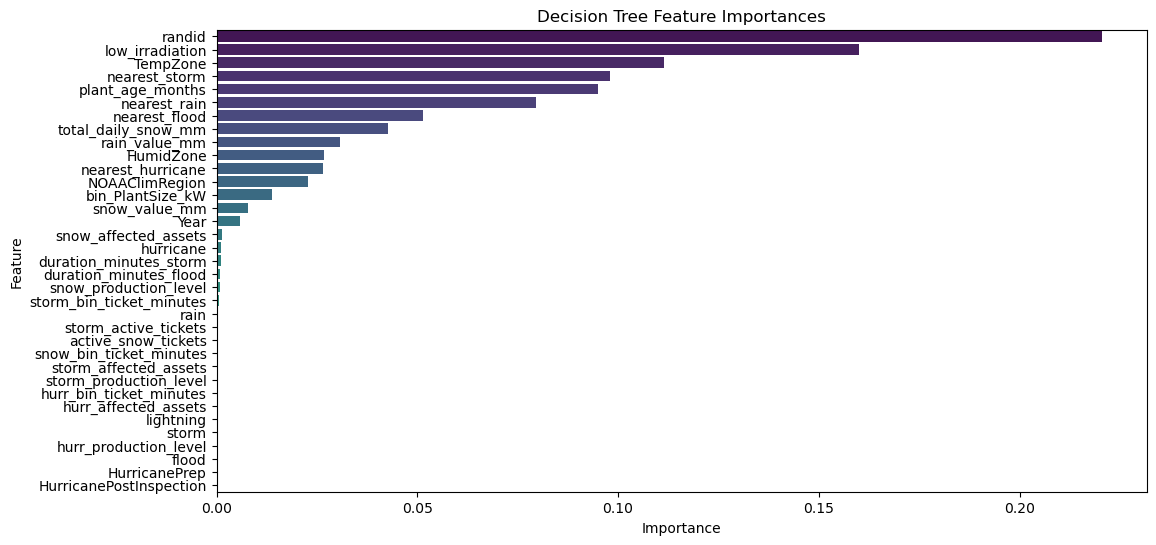

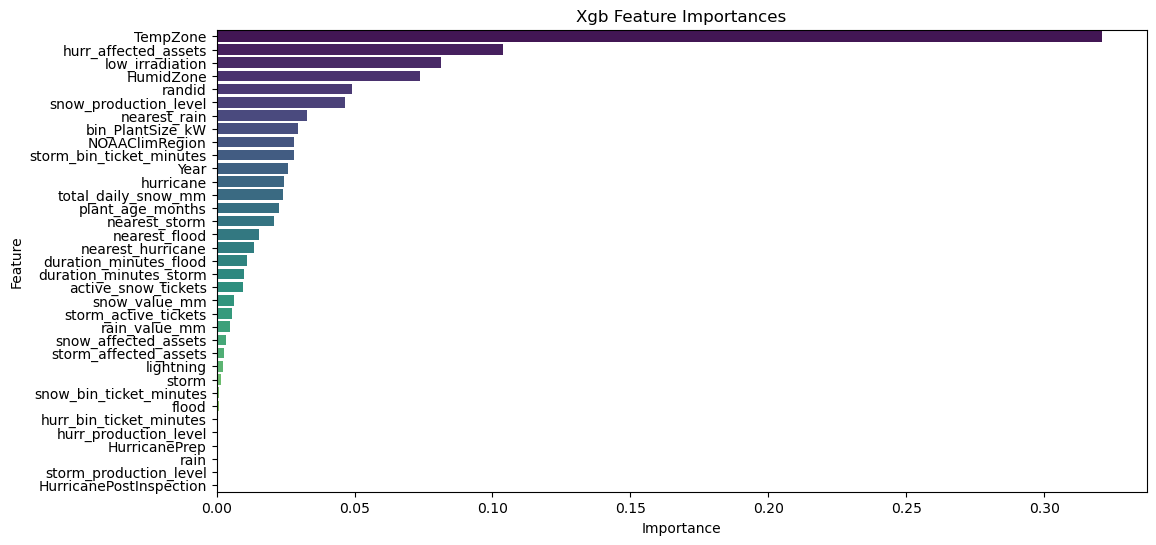

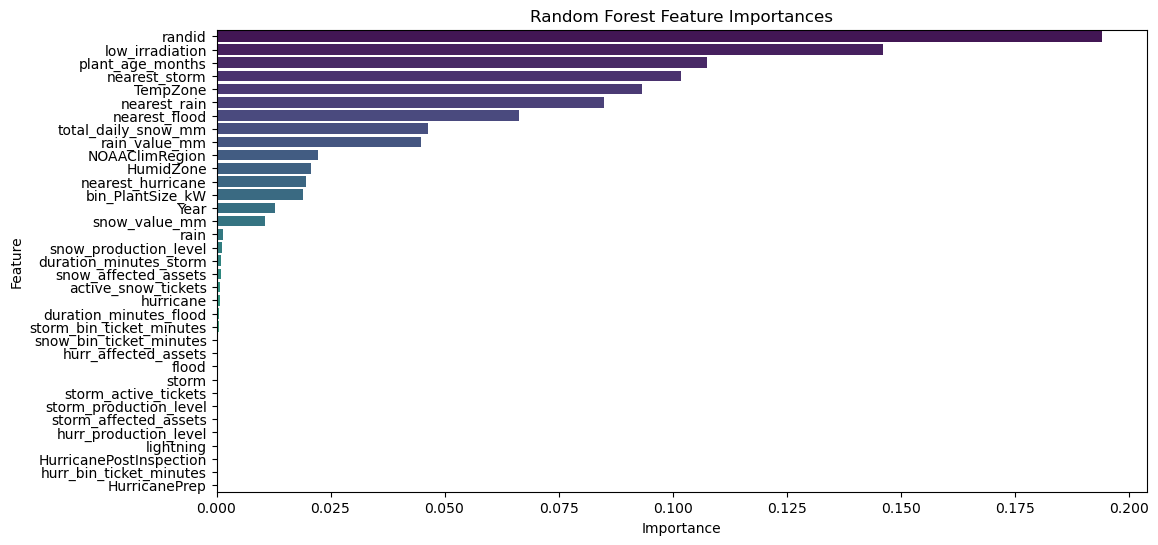

In [36]:
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

for model_name in models.keys():
    pipeline = pipelines[model_name]
    pipeline.fit(X_train1, y_train1)  
    model = pipeline.named_steps['regressor']
    plot_feature_importances(model, X1.columns, f'{model_name.replace("_", " ").title()} Feature Importances')

# Hyperparameter Tuning

(Code snippet commented to save computational cost and time.)

In [28]:
# def find_best_parameters(model_name, pipeline, param_grid, X, y, cv_folds=9):
#     kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
#     grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X, y)
    
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_
    
#     return best_model, best_params


# X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

# pipeline, param_grid = pipelines_and_params['random_forest']
# print(f"\nFinding best parameters for RandomForestRegressor on Dataset 1")
# best_model, best_params = find_best_parameters('random_forest', pipeline, param_grid, X_train1, y_train1)

# print(f"\nBest Parameters for RandomForestRegressor:")
# print(best_params)

In [31]:
# pipeline_dt = Pipeline([
#     ('regressor', DecisionTreeRegressor())
# ])
# param_grid_dt = {
#     'regressor__max_depth': [None, 10, 20, 30],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }

# pipeline_rf = Pipeline([
#     ('regressor', RandomForestRegressor())
# ])
# param_grid_rf = {
#     'regressor__n_estimators': [50, 100, 200],
#     'regressor__max_depth': [None, 10, 20, 30],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }

# pipelines_and_params = {
#     'decision_tree': (pipeline_dt, param_grid_dt),
#     'random_forest': (pipeline_rf, param_grid_rf)
# }

# def find_best_parameters(model_name, pipeline, param_grid, X, y, cv_folds=9):
#     kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
#     grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X, y)
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_
#     return best_model, best_params

# X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

# pipeline, param_grid = pipelines_and_params['decision_tree']
# print(f"\nFinding best parameters for DecisionTreeRegressor on Dataset 1")
# best_model, best_params = find_best_parameters('decision_tree', pipeline, param_grid, X_train1, y_train1)

# print(f"\nBest Parameters for DecisionTreeRegressor:")
# print(best_params)



Finding best parameters for DecisionTreeRegressor on Dataset 1

Best Parameters for DecisionTreeRegressor:
{'regressor__max_depth': 20, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
